# Analisis de la salida de un switch #

**Codigo Python**

In [15]:
# Se importan las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
# Cargando los datos
switch_df = pd.read_csv('monitoreo.csv',sep=';', index_col=0)
# Reindexando
switch_df_as_list = switch_df.index.tolist()
v_ini= switch_df_as_list[0]
switch_df_as_list = list(map(lambda x: x - v_ini, switch_df_as_list))
switch_df.index = switch_df_as_list 
# Dividiendo en grupos de acuerdo a la interface
grouped = switch_df.groupby('iface_name')
# Obteniendo informacion de cada interfaz
info_s1_eth1 = grouped.get_group('s1-eth1')
info_s1_eth2 = grouped.get_group('s1-eth2')
info_s1_eth3 = grouped.get_group('s1-eth3')
info_lo = grouped.get_group('lo')
# print(info_lo)
switch_df.head(20)
#switch_df.head(100)

,iface_name,bytes_out/s,bytes_in/s,bytes_total/s,bytes_in,bytes_out,packets_out/s,packets_in/s,packets_total/s,packets_in,packets_out,errors_out/s,errors_in/s,errors_in,errors_out\n
0,s1-eth1,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
0,s1-eth2,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
0,lo,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
0,s1-eth3,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
0,total,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1,s1-eth1,176.0,176.0,352.0,176,176,2.0,2.0,4.0,2,2,0.0,0.0,0.0,0.0
1,s1-eth2,176.0,176.0,352.0,176,176,2.0,2.0,4.0,2,2,0.0,0.0,0.0,0.0
1,lo,646.0,646.0,1292.0,646,646,9.0,9.0,18.0,9,9,0.0,0.0,0.0,0.0
1,s1-eth3,176.0,176.0,352.0,176,176,2.0,2.0,4.0,2,2,0.0,0.0,0.0,0.0
1,total,1174.0,1174.0,2348.0,1174,1174,15.0,15.0,30.0,15,15,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


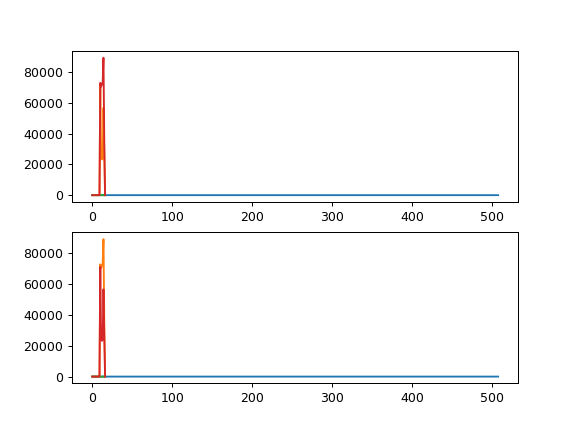

In [12]:
%matplotlib notebook
plt.figure(1)
# bytes_in/s
plt.subplot(211)
plt.plot(info_lo.index, info_lo['packets_out/s'])
plt.plot(info_s1_eth1.index, info_s1_eth1['packets_out/s'])
plt.plot(info_s1_eth2.index, info_s1_eth2['packets_out/s'])
plt.plot(info_s1_eth3.index, info_s1_eth3['packets_out/s'])
#plt.set(xlabel='time (s)', ylabel='packets_out/s',
#       title='Metricas s1')
# bytes_out/s
plt.subplot(212)
plt.plot(info_lo.index, info_lo['packets_in/s'])
plt.plot(info_s1_eth1.index, info_s1_eth1['packets_in/s'])
plt.plot(info_s1_eth2.index, info_s1_eth2['packets_in/s'])
plt.plot(info_s1_eth3.index, info_s1_eth3['packets_in/s'])
#plt.set(xlabel='time (s)', ylabel='packets_in/s',
#       title='Metricas s1')

In [17]:
info_lo.head(100)

,iface_name,bytes_out/s,bytes_in/s,bytes_total/s,bytes_in,bytes_out,packets_out/s,packets_in/s,packets_total/s,packets_in,packets_out,errors_out/s,errors_in/s,errors_in,errors_out\n
0,lo,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1,lo,646.0,646.0,1292.0,646,646,9.0,9.0,18.0,9,9,0.0,0.0,0.0,0.0
2,lo,4726.0,4726.0,9452.0,4726,4726,49.0,49.0,98.0,49,49,0.0,0.0,0.0,0.0
3,lo,341.0,341.0,682.0,341,341,4.0,4.0,8.0,4,4,0.0,0.0,0.0,0.0
4,lo,277.0,277.0,554.0,277,277,3.0,3.0,6.0,3,3,0.0,0.0,0.0,0.0
5,lo,628.0,628.0,1256.0,628,628,8.0,8.0,16.0,8,8,0.0,0.0,0.0,0.0
7,lo,4330.0,4330.0,8660.0,4330,4330,36.0,36.0,72.0,36,36,0.0,0.0,0.0,0.0
8,lo,308.0,308.0,616.0,308,308,3.0,3.0,6.0,3,3,0.0,0.0,0.0,0.0
9,lo,264.0,264.0,528.0,264,264,3.0,3.0,6.0,3,3,0.0,0.0,0.0,0.0
10,lo,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


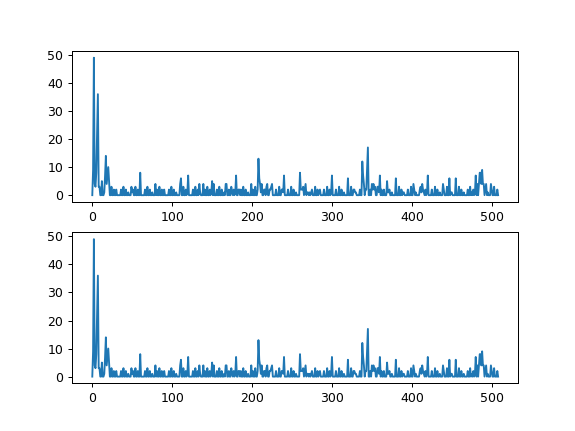

In [22]:
%matplotlib notebook
plt.figure(1)
# bytes_in/s
plt.subplot(211)
plt.plot(info_lo.index, info_lo['packets_out/s'])
plt.subplot(212)
plt.plot(info_lo.index, info_lo['packets_in/s'])

## Caso wireshark ##

Este caso difiere del anterior por que se llevo a cabo un ataque de denegación de servicio

**Algunos filtros empleados**:
1. openflow_v4
2. openflow_v4.type && tcp.port == 6653
3. openflow_v4.type == OFPT_PACKET_IN
4. (openflow_v4.type == OFPT_PACKET_IN)&&(tcp.port==6653) 
5. (openflow_v4.type == OFPT_PACKET_OUT)&&(tcp.port==6653) 

**Caso tshark**:
A continuacion se muestran algunos comandos:

```
tshark -r traza2_of.pcap.gz
tshark -r traza2_of.pcap.gz -Y openflow_v4.type && tcp.port == 6653
```



In [20]:
# Cargando los datos
traza_of = pd.read_csv('traza2_of.pcap.csv',sep=',', index_col=0)
traza_of.head(20)


,of_packets,of_PACKET_IN,of_PACKET_OUT
Interval start,,,
0.00,2,0,0
0.01,0,0,0
0.02,0,0,0
0.03,0,0,0
0.04,0,0,0
0.05,0,0,0
0.06,0,0,0
0.07,0,0,0
0.08,0,0,0


<IPython.core.display.Javascript object>


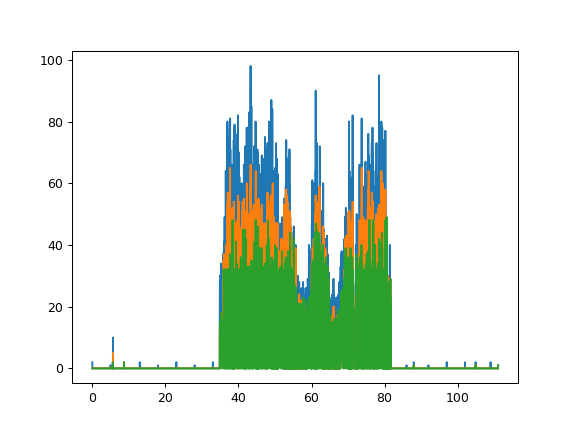

In [21]:
%matplotlib notebook
plt.figure(1)
plt.plot(traza_of.index, traza_of['of_packets'])
plt.plot(traza_of.index, traza_of['of_PACKET_IN'])
plt.plot(traza_of.index, traza_of['of_PACKET_OUT'])

A continuacion se muestra la grafica de wireshark:

![grafica](traza2_of)